# Evacuees over time

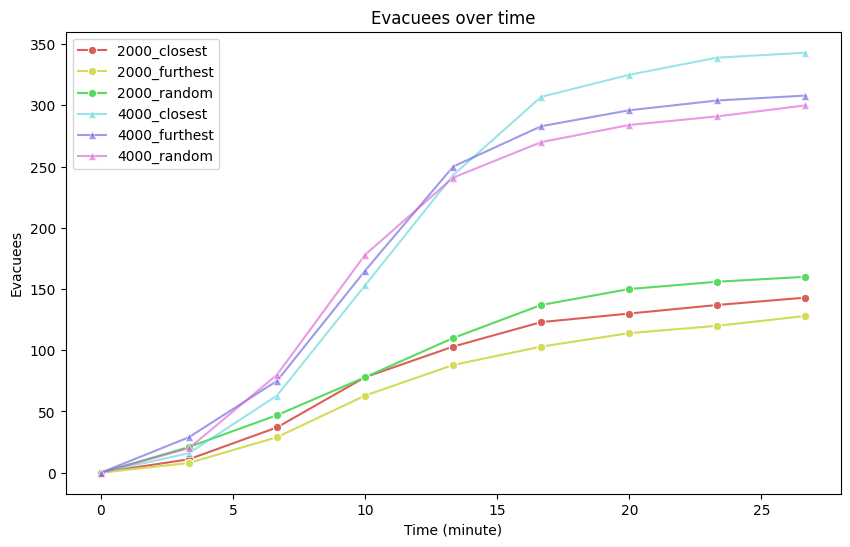

In [ ]:
import pandas as pd
import numpy as np
from pathlib import Path

RESULT_PATH = Path('../results')

df_2000_closest = pd.read_csv(RESULT_PATH / 'evacuees_2000_closest.csv')
df_2000_furthest = pd.read_csv(RESULT_PATH / 'evacuees_2000_furthest.csv')
df_2000_random = pd.read_csv(RESULT_PATH / 'evacuees_2000_random.csv')

df_4000_closest = pd.read_csv(RESULT_PATH / 'evacuees_4000_closest.csv')
df_4000_furthest = pd.read_csv(RESULT_PATH / 'evacuees_4000_furthest.csv')
df_4000_random = pd.read_csv(RESULT_PATH / 'evacuees_4000_random.csv')

max_time = 30*60
df_2000_closest = df_2000_closest[df_2000_closest['time'] < max_time]
df_2000_furthest = df_2000_furthest[df_2000_furthest['time'] < max_time]
df_2000_random = df_2000_random[df_2000_random['time'] < max_time]
df_4000_closest = df_4000_closest[df_4000_closest['time'] < max_time]
df_4000_furthest = df_4000_furthest[df_4000_furthest['time'] < max_time]
df_4000_random = df_4000_random[df_4000_random['time'] < max_time]

for df in [df_2000_closest, df_2000_furthest, df_2000_random, df_4000_closest, df_4000_furthest, df_4000_random]:
	df['minute'] = df['time'] / 60.0

df_2000_furthest.head()

# draw plot of 6 series
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("hls")

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_2000_closest, x='minute', y='number_evacuted_people', label='2000_closest', marker='o')
sns.lineplot(data=df_2000_furthest, x='minute', y='number_evacuted_people', label='2000_furthest', marker='o')
sns.lineplot(data=df_2000_random, x='minute', y='number_evacuted_people', label='2000_random', marker='o')

sns.lineplot(data=df_4000_closest, x='minute', y='number_evacuted_people', label='4000_closest', marker='^', alpha=0.6)
sns.lineplot(data=df_4000_furthest, x='minute', y='number_evacuted_people', label='4000_furthest', marker='^', alpha=0.6)
sns.lineplot(data=df_4000_random, x='minute', y='number_evacuted_people', label='4000_random', marker='^', alpha=0.6)
plt.title('Evacuees over time')
plt.xlabel('Time (minute)')
plt.ylabel('Evacuees')
plt.show()




# Alert time studying

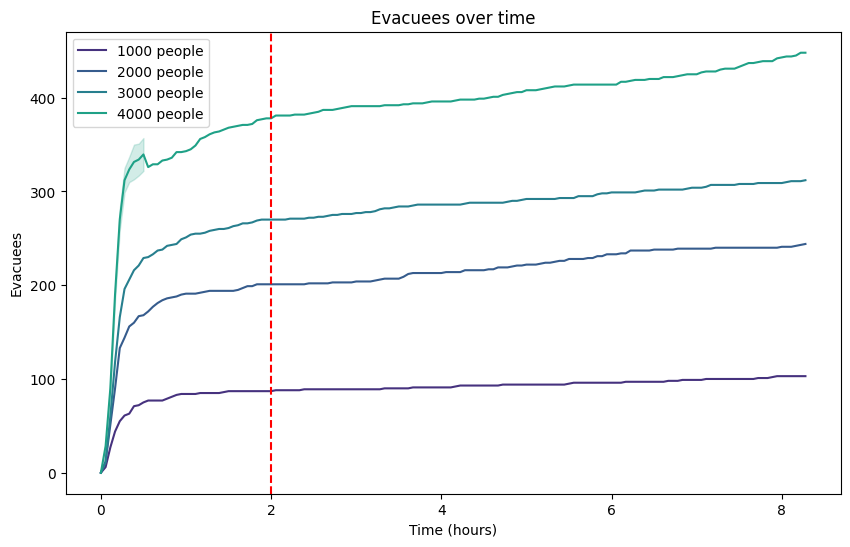

In [7]:
import pandas as pd
import numpy as np
from pathlib import Path

RESULT_PATH = Path('../results')

evacuees_1000_random_1440 = pd.read_csv(RESULT_PATH / 'evacuees_1000_random_1440.csv')
evacuees_2000_random_1440 = pd.read_csv(RESULT_PATH / 'evacuees_2000_random_1440.csv')
evacuees_3000_random_1440 = pd.read_csv(RESULT_PATH / 'evacuees_3000_random_1440.csv')
evacuees_4000_random_1440 = pd.read_csv(RESULT_PATH / 'evacuees_4000_random_1440.csv')

max_time = 30000
evacuees_1000_random_1440 = evacuees_1000_random_1440[evacuees_1000_random_1440['time'] < max_time]
evacuees_2000_random_1440 = evacuees_2000_random_1440[evacuees_2000_random_1440['time'] < max_time]
evacuees_3000_random_1440 = evacuees_3000_random_1440[evacuees_3000_random_1440['time'] < max_time]
evacuees_4000_random_1440 = evacuees_4000_random_1440[evacuees_4000_random_1440['time'] < max_time]

for df in [evacuees_1000_random_1440, evacuees_2000_random_1440, evacuees_3000_random_1440, evacuees_4000_random_1440]:
	df['hours'] = df['time'] / 3600.0

# df_2000_furthest.head()

# draw plot of 6 series
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("viridis")

plt.figure(figsize=(10, 6))
sns.lineplot(data=evacuees_1000_random_1440, x='hours', y='number_evacuted_people', label='1000 people')
sns.lineplot(data=evacuees_2000_random_1440, x='hours', y='number_evacuted_people', label='2000 people')
sns.lineplot(data=evacuees_3000_random_1440, x='hours', y='number_evacuted_people', label='3000 people')
sns.lineplot(data=evacuees_4000_random_1440, x='hours', y='number_evacuted_people', label='4000 people')

# draw a vertical line at 2 hour
plt.axvline(x=2, color='r', linestyle='--')

plt.title('Evacuees over time')
plt.xlabel('Time (hours)')
plt.ylabel('Evacuees')
plt.show()

# Most Effective Strategy

In [66]:
import pandas as pd
import numpy as np

df = pd.read_csv('../results/batch.csv')

# find row with max number of evacuees
max_evacuees = df['number_evacuted_people'].max()
max_row = df[df['number_evacuted_people'] == max_evacuees]
print(f'Max evacuees: {max_row}')


# find row with max number of efficiency
efficiency = df['efficiency'].max()
max_row = df[df['efficiency'] == efficiency]
print(f'Max evacuees: {max_row}')


Max evacuees:     nb_of_people initial_inform_strategy  flooding_alert_time_minutes  \
11          4000                  random                        120.0   

    number_evacuted_people  total_time_in_roads  efficiency  
11                   390.6           25555912.0    0.001834  
Max evacuees:     nb_of_people initial_inform_strategy  flooding_alert_time_minutes  \
24          1500                 closest                         60.0   

    number_evacuted_people  total_time_in_roads  efficiency  
24                   137.4            4213146.0    0.001958  


In [13]:
df_120 = df[df['flooding_alert_time_minutes'] == 120]
df_120 = df_120[['initial_inform_strategy', 'nb_of_people', 'number_evacuted_people', 'total_time_in_roads', 'efficiency']]
df_120

,initial_inform_strategy,nb_of_people,number_evacuted_people,total_time_in_roads,efficiency
2,random,1500,142.4,9204840.0,0.001858
5,random,2000,180.8,12519134.0,0.001735
8,random,3000,287.2,19016348.0,0.001812
11,random,4000,390.6,25555912.0,0.001834
14,furthest,1500,138.6,9116900.0,0.001825
17,furthest,2000,186.4,12379352.0,0.001811
20,furthest,3000,291.8,18816798.0,0.001862
23,furthest,4000,370.4,25506842.0,0.001743
26,closest,1500,146.6,9048712.0,0.001945
29,closest,2000,195.2,12304554.0,0.001905


In [15]:
df.head()

,nb_of_people,initial_inform_strategy,flooding_alert_time_minutes,number_evacuted_people,total_time_in_roads,efficiency
0,1500,random,60.0,129.4,4349758.0,0.001786
1,1500,random,90.0,137.4,6775892.0,0.001826
2,1500,random,120.0,142.4,9204840.0,0.001858
3,2000,random,60.0,166.6,5994166.0,0.001669
4,2000,random,90.0,176.2,9256124.0,0.001715


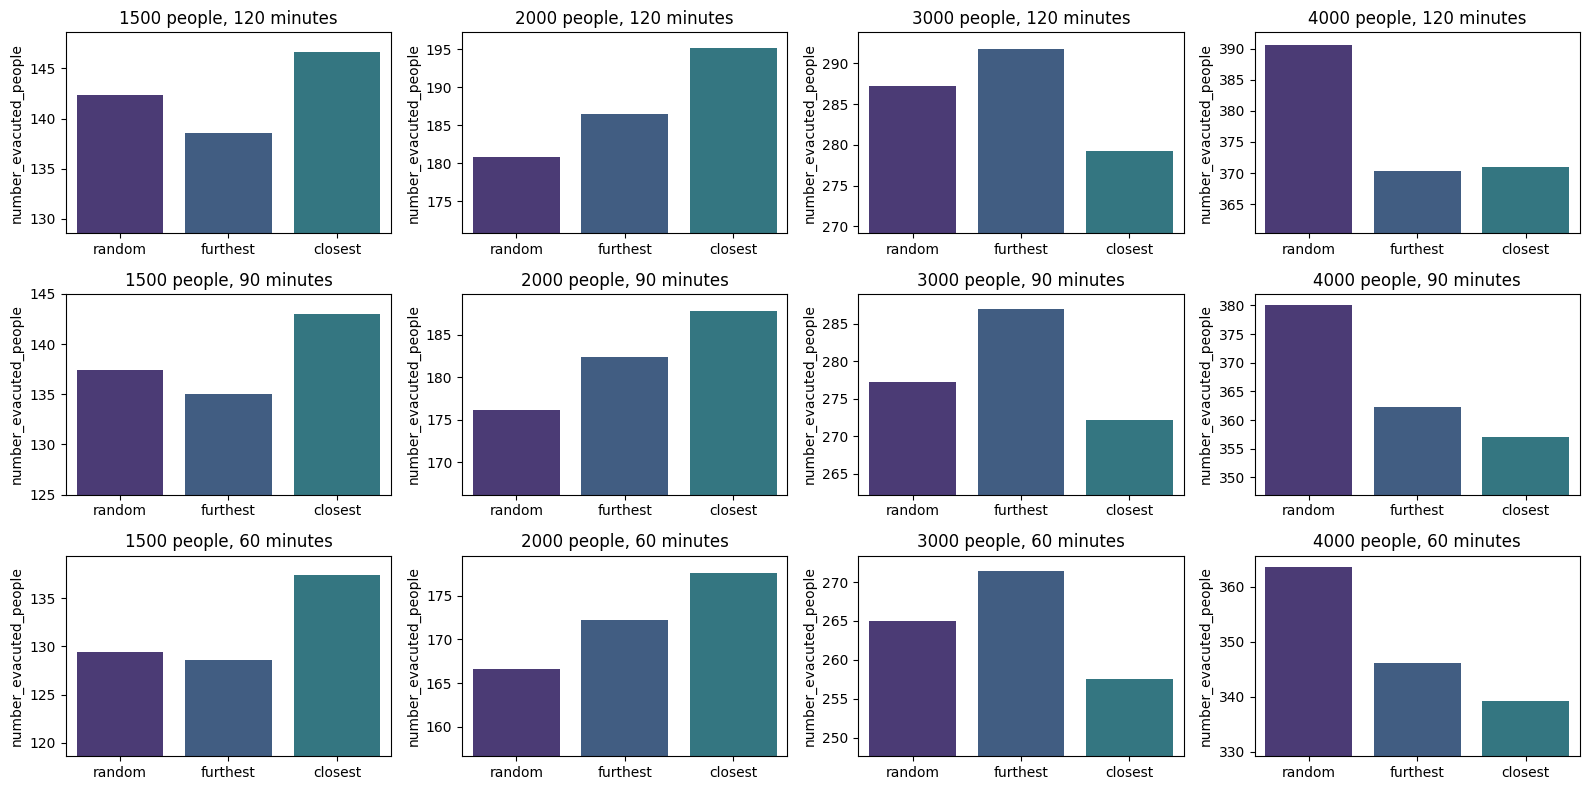

In [ ]:
# Batch exploration: number of evacuees by initial inform strategy

n_people_list = [1500, 2000, 3000, 4000]
alert_time_list = [60, 90, 120]

sns.set_palette("viridis")

# draw grid of 4x3 plots, display labels in row and column
fig, axs = plt.subplots(3, 4, figsize=(16, 8))
for i, alert_time in enumerate(alert_time_list[::-1]):
	for j, nb_people in enumerate(n_people_list):
		df_sub = df[(df['nb_of_people'] == nb_people) & (df['flooding_alert_time_minutes'] == alert_time)]
		df_sub = df_sub[['initial_inform_strategy', 'number_evacuted_people', 'total_time_in_roads', 'efficiency']]
		# df_sub = df_sub.set_index('initial_inform_strategy')
		# use seaborn to draw bar plot, color by strategy
		axs[i, j].set_title(f'{nb_people} people, {alert_time} minutes')
		sns.barplot(data=df_sub, ax=axs[i, j], x='initial_inform_strategy', y='number_evacuted_people', hue="initial_inform_strategy")
		axs[i, j].set_xlabel(None)
		min_y = df_sub['number_evacuted_people'].min() - 10
		max_y = df_sub['number_evacuted_people'].max() + 2
		axs[i, j].set(ylim=(min_y, max_y))

plt.tight_layout()

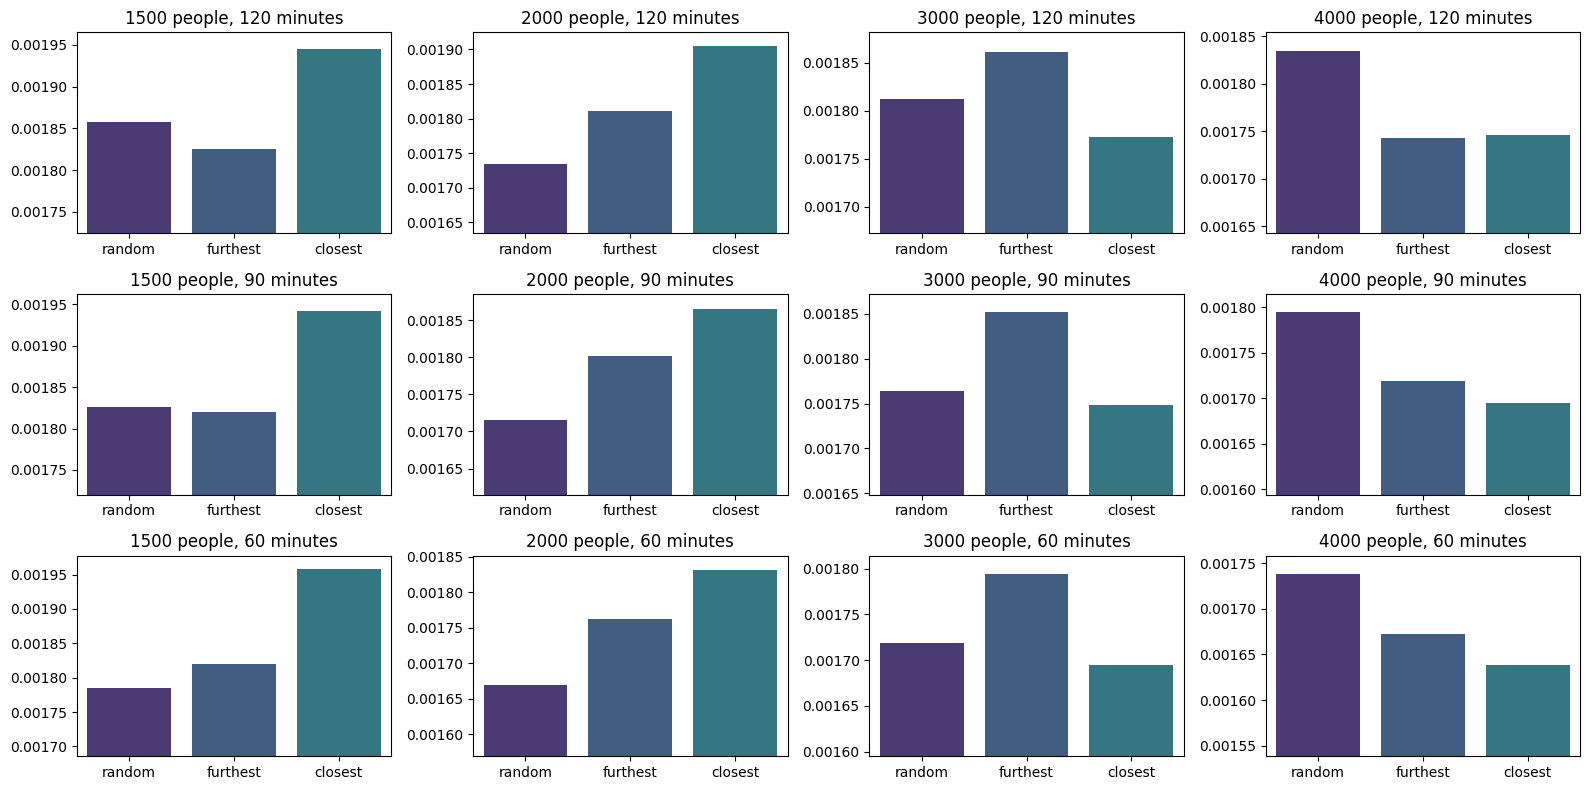

In [85]:
# Batch exploration: efficiency by initial inform strategy

n_people_list = [1500, 2000, 3000, 4000]
alert_time_list = [60, 90, 120]

sns.set_palette("viridis")

# draw grid of 4x3 plots, display labels in row and column
fig, axs = plt.subplots(3, 4, figsize=(16, 8))
for i, alert_time in enumerate(alert_time_list[::-1]):
	for j, nb_people in enumerate(n_people_list):
		df_sub = df[(df['nb_of_people'] == nb_people) & (df['flooding_alert_time_minutes'] == alert_time)]
		df_sub = df_sub[['initial_inform_strategy', 'number_evacuted_people', 'total_time_in_roads', 'efficiency']]
		# df_sub = df_sub.set_index('initial_inform_strategy')
		# use seaborn to draw bar plot, color by strategy
		ax = axs[i, j]
		ax.set_title(f'{nb_people} people, {alert_time} minutes')
		sns.barplot(data=df_sub, ax=ax, x='initial_inform_strategy', y='efficiency', hue="initial_inform_strategy")
		ax.set_xlabel(None)
		ax.set_ylabel(None)
		min_y = df_sub['efficiency'].min() - 0.0001
		max_y = df_sub['efficiency'].max() + 0.00002
		axs[i, j].set(ylim=(min_y, max_y))

plt.tight_layout()